<a href="https://colab.research.google.com/github/Saybuuu/utair_test_case/blob/main/Utair_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/папка/Perspective_sales.csv'

Начнем с начала и посмотрим наш датасет


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
raw_df = pd.DataFrame(data)
raw_df.head()

,Unnamed: 0,Flight_number,Departure_IATA,Arrival_IATA,Direction,Route,Capacity,Departure_date,vvl_mvl,Reg_Mow,"Rev, rub",Segments,year,Departure_Name,Arrival_Name
0,0,138,OVB,SGC,OVB-SGC,OVB-SGC,70,2024-03-21,ВВЛ,Региональный,49887.0,10.0,2024,Новосибирск(Толмачево),Сургут
1,1,139,SGC,OMS,SGC-OMS,OMS-SGC,70,2024-03-21,ВВЛ,Региональный,311741.0,73.0,2024,Сургут,Омск(Центральный)
2,2,140,OMS,SGC,OMS-SGC,OMS-SGC,70,2024-03-21,ВВЛ,Региональный,283740.0,68.0,2024,Омск(Центральный),Сургут
3,3,219,TJM,NYA,TJM-NYA,NYA-TJM,70,2024-03-21,ВВЛ,Региональный,122552.0,35.0,2024,Тюмень(Рощино),Нягань
4,4,220,NYA,TJM,NYA-TJM,NYA-TJM,70,2024-03-21,ВВЛ,Региональный,219275.0,62.0,2024,Нягань,Тюмень(Рощино)


In [ ]:
print(raw_df['vvl_mvl'].unique())
# display(sorted(raw_df['Departure_date'].unique()))

['ВВЛ' 'МВЛ']


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28002 entries, 0 to 28001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      28002 non-null  int64  
 1   Flight_number   28002 non-null  int64  
 2   Departure_IATA  28002 non-null  object 
 3   Arrival_IATA    28002 non-null  object 
 4   Direction       28002 non-null  object 
 5   Route           28002 non-null  object 
 6   Capacity        28002 non-null  int64  
 7   Departure_date  28002 non-null  object 
 8   vvl_mvl         28002 non-null  object 
 9   Reg_Mow         28002 non-null  object 
 10  Rev, rub        28002 non-null  float64
 11  Segments        28002 non-null  float64
 12  year            28002 non-null  int64  
 13  Departure_Name  28002 non-null  object 
 14  Arrival_Name    28002 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.2+ MB


Проведем сравнительный анализ продаж на период майских праздников 2025 и 2024 годов

In [ ]:
seg__df_2025 = raw_df[raw_df['year'] == 2025]['Segments'].sum()
seg__df_2024 = raw_df[raw_df['year'] == 2024]['Segments'].sum()
seg___increase = seg__df_2025 /seg__df_2024
print(seg___increase)

1.1068387258958217


In [ ]:
df_2025 = raw_df[raw_df['year'] == 2025]
df_2024 = raw_df[raw_df['year'] == 2024]
rought_increase = len(df_2025) /len(df_2024)
print(rought_increase)

1.1490406753645435


In [ ]:
rev_inceace = df_2025['Rev, rub'].sum() / df_2024['Rev, rub'].sum()
print(rev_inceace)

1.1853001964803491


In [ ]:
len(df_2025['Route'].unique())

90

In [ ]:
len(df_2024['Route'].unique())

89

Пункт 2
Мы проанализировали продажи на период майских праздников 2025 и 2024 годов и выявили что по отношению к прошлому году у нас приросло колличество маршрутов увелилось ( на 1 ) и вылетов ( на 14.9 %) и пассажиров ( на 10.7% ), однако с учетом инфляции и прочих факторов выручка приросла лишь на ( на 18.5% )

Далее мы  Определим топ-5 маршрутов на Международных ВЛ и Внутренних ВЛ по загрузке (Занятость кресел) среднему тарифу (Rev/seg)

In [ ]:
may_hol_25 = df_2025[(df_2025['Departure_date'] >= '2025-03-21') & (df_2025['Departure_date'] <= '2025-04-11')]

In [ ]:
may_hol_24 = df_2024[(df_2024['Departure_date'] >= '2024-03-22') & (df_2024['Departure_date'] <= '2024-04-12')]

In [ ]:
rev_inceace_may = may_hol_25['Rev, rub'].sum() / may_hol_24['Rev, rub'].sum()
print(rev_inceace_may)

1.2324623479580747


In [ ]:
quantity_increase_may = len(may_hol_25) /len(may_hol_24)
print(quantity_increase_may)

1.0855148342059338


Топ 5 маршрутов международных ВЛ в 2025 году за период майских праздников

In [ ]:
mvl_rev_df_2025 = may_hol_25[(may_hol_25['vvl_mvl'] == 'МВЛ')].groupby('Route')['Rev, rub'].sum().reset_index()
mvl_seg_df_2025 = may_hol_25[(may_hol_25['vvl_mvl'] == 'МВЛ')].groupby('Route')['Segments'].sum().reset_index()
mvl_rev_seg_may_hol_25 = pd.merge(mvl_rev_df_2025, mvl_seg_df_2025, on='Route')
mvl_rev_seg_may_hol_25['rev_seg'] = mvl_rev_seg_may_hol_25['Rev, rub'] / mvl_rev_seg_may_hol_25['Segments']
mvl_rev_seg_may_hol_25.sort_values(by='rev_seg').tail(5)

,Route,"Rev, rub",Segments,rev_seg
13,GYD-TJM,3460958.0,183.0,18912.338798
1,DWC-GRV,9799728.0,471.0,20806.216561
12,GYD-SGC,7741320.0,343.0,22569.446064
3,DWC-TJM,45059019.0,1868.0,24121.530514
2,DWC-SGC,22833438.0,810.0,28189.429630


Топ 5 маршрутов международных ВЛ в 2024 году за период майских праздников

In [ ]:
mvl_rev_df_2024 = may_hol_24[(may_hol_24['vvl_mvl'] == 'МВЛ')].groupby('Route')['Rev, rub'].sum().reset_index()
mvl_seg_df_2024 = may_hol_24[(may_hol_24['vvl_mvl'] == 'МВЛ')].groupby('Route')['Segments'].sum().reset_index()
mvl_rev_seg_may_hol_24 = pd.merge(mvl_rev_df_2024, mvl_seg_df_2024, on='Route')
mvl_rev_seg_may_hol_24['rev_seg'] = mvl_rev_seg_may_hol_24['Rev, rub'] / mvl_rev_seg_may_hol_24['Segments']
mvl_rev_seg_may_hol_24.sort_values(by='rev_seg').tail(5)

,Route,"Rev, rub",Segments,rev_seg
13,GYD-TJM,2740091.0,135.0,20296.970370
4,DYU-VKO,25224790.0,1182.0,21340.769882
12,GYD-SGC,5570331.0,256.0,21759.105469
3,DWC-TJM,34568840.0,1544.0,22389.145078
2,DWC-SGC,19240001.0,732.0,26284.154372


Топ 5 маршрутов внетренних ВЛ в 2025 году за период майских праздников

In [ ]:
vvl_rev_df_2025 = may_hol_25[(may_hol_25['vvl_mvl'] == 'ВВЛ')].groupby('Route')['Rev, rub'].sum().reset_index()
vvl_seg_df_2025 = may_hol_25[(may_hol_25['vvl_mvl'] == 'ВВЛ')].groupby('Route')['Segments'].sum().reset_index()
vvl_rev_seg_may_hol_25 = pd.merge(vvl_rev_df_2025, vvl_seg_df_2025, on='Route')
vvl_rev_seg_may_hol_25['rev_seg'] = vvl_rev_seg_may_hol_25['Rev, rub'] / vvl_rev_seg_may_hol_25['Segments']
vvl_rev_seg_may_hol_25.sort_values(by='rev_seg').tail(5)

,Route,"Rev, rub",Segments,rev_seg
40,NUX-UFA,22648110.0,1694.0,13369.604486
0,AER-SGC,37949204.0,2554.0,14858.732968
39,NUX-TJM,11928702.0,790.0,15099.622785
30,MRV-SGC,12166426.0,746.0,16308.882038
65,USK-VKO,10329547.0,619.0,16687.474960


Топ 5 маршрутов внетренних ВЛ в 2024 году за период майских праздников

In [ ]:
vvl_rev_df_2024 = may_hol_24[(may_hol_24['vvl_mvl'] == 'ВВЛ')].groupby('Route')['Rev, rub'].sum().reset_index()
vvl_seg_df_2024 = may_hol_24[(may_hol_24['vvl_mvl'] == 'ВВЛ')].groupby('Route')['Segments'].sum().reset_index()
vvl_rev_seg_may_hol_24 = pd.merge(vvl_rev_df_2024, vvl_seg_df_2024, on='Route')
vvl_rev_seg_may_hol_24['rev_seg'] = vvl_rev_seg_may_hol_24['Rev, rub'] / vvl_rev_seg_may_hol_24['Segments']
vvl_rev_seg_may_hol_24.sort_values(by='rev_seg').tail(5)

,Route,"Rev, rub",Segments,rev_seg
18,IKT-UKX,540785.0,53.0,10203.490566
39,NUX-UFA,19322050.0,1622.0,11912.484587
0,AER-SGC,40425662.0,3098.0,13048.954810
63,USK-VKO,6404703.0,441.0,14523.136054
29,MRV-SGC,12649471.0,832.0,15203.691106


Определим топ-5 маршрутов с наибольшим положительным и отрицательным приростом по загрузке/средне тарифу в 2025 году к 2024 году   

In [ ]:
may_hol_24.head()

,Unnamed: 0,Flight_number,Departure_IATA,Arrival_IATA,Direction,Route,Capacity,Departure_date,vvl_mvl,Reg_Mow,"Rev, rub",Segments,year,Departure_Name,Arrival_Name
960,960,101,SGC,TJM,SGC-TJM,SGC-TJM,70,2024-03-22,ВВЛ,Региональный,208340.0,42.0,2024,Сургут,Тюмень(Рощино)
961,961,102,TJM,SGC,TJM-SGC,SGC-TJM,70,2024-03-22,ВВЛ,Региональный,93282.0,41.0,2024,Тюмень(Рощино),Сургут
962,962,103,SGC,UFA,SGC-UFA,SGC-UFA,70,2024-03-22,ВВЛ,Региональный,656746.0,56.0,2024,Сургут,Уфа
963,963,104,UFA,SGC,UFA-SGC,SGC-UFA,70,2024-03-22,ВВЛ,Региональный,185099.0,26.0,2024,Уфа,Сургут
964,964,105,SVX,UFA,SVX-UFA,SVX-UFA,70,2024-03-22,ВВЛ,Региональный,247620.0,30.0,2024,Екатеринбург(Кольцово),Уфа


In [ ]:
data_to_pivot_2024 = may_hol_24.groupby('Route').agg({'Capacity': 'sum', 'Rev, rub': 'sum', 'Segments': 'sum'})
data_to_pivot_2024['av_tarif_24'] = data_to_pivot_2024['Rev, rub'] / data_to_pivot_2024['Segments']
data_to_pivot_2024['load_24'] = data_to_pivot_2024['Segments'] / data_to_pivot_2024['Capacity']


In [ ]:
data_to_pivot_2025 = may_hol_25.groupby('Route').agg({'Capacity': 'sum', 'Rev, rub': 'sum', 'Segments': 'sum'})
data_to_pivot_2025['av_tarif_25'] = data_to_pivot_2025['Rev, rub'] / data_to_pivot_2025['Segments']
data_to_pivot_2025['load_25'] = data_to_pivot_2025['Segments'] / data_to_pivot_2025['Capacity']

In [ ]:
data_to_pivot_2025.head()

,Capacity,"Rev, rub",Segments,av_tarif_25,load_25
Route,,,,,
AER-SGC,4368,37949204.0,2554.0,14858.732968,0.584707
AER-TJM,3276,22656696.0,2283.0,9924.089356,0.696886
AER-VKO,14196,55045226.0,5719.0,9624.973946,0.402860
BAX-SGC,420,1437944.0,201.0,7153.950249,0.478571
BHK-VKO,4650,13319899.0,862.0,15452.319026,0.185376


In [ ]:
load_df = pd.merge(data_to_pivot_2024, data_to_pivot_2025, on='Route')
load_df['res'] =  load_df['load_25'] - load_df['load_24']
sorted_load_df = load_df.sort_values('res')
sorted_load_df.head(5)

,Capacity_x,"Rev, rub_x",Segments_x,av_tarif_24,load_24,Capacity_y,"Rev, rub_y",Segments_y,av_tarif_25,load_25,res
Route,,,,,,,,,,,
EYK-TJM,280,846242.0,188.0,4501.287234,0.671429,840,1967731.0,384.0,5124.299479,0.457143,-0.214286
NJC-OMS,980,2143176.0,548.0,3910.905109,0.559184,980,2468363.0,379.0,6512.831135,0.386735,-0.172449
FEG-VKO,1116,3212098.0,261.0,12306.888889,0.233871,1116,1098482.0,85.0,12923.317647,0.076165,-0.157706
KUF-SGC,3024,7922806.0,1282.0,6180.035881,0.423942,4032,9727666.0,1216.0,7999.725329,0.301587,-0.122354
BHK-VKO,3348,14485556.0,927.0,15626.274002,0.276882,4650,13319899.0,862.0,15452.319026,0.185376,-0.091505


In [ ]:
sorted_load_df.tail(5)

,Capacity_x,"Rev, rub_x",Segments_x,av_tarif_24,load_24,Capacity_y,"Rev, rub_y",Segments_y,av_tarif_25,load_25,res
Route,,,,,,,,,,,
LED-SGC,7830,15253961.0,1949.0,7826.557722,0.248914,5464,16168175.0,2085.0,7754.520384,0.381589,0.132674
EYK-HMA,1190,386223.0,116.0,3329.508621,0.097479,1330,1091580.0,312.0,3498.653846,0.234586,0.137107
DWC-TJM,2604,34568840.0,1544.0,22389.145078,0.592934,2540,45059019.0,1868.0,24121.530514,0.735433,0.142499
NJC-UFA,4104,5344256.0,667.0,8012.377811,0.162524,2016,5821728.0,629.0,9255.529412,0.312004,0.149480
BAX-SGC,280,411308.0,74.0,5558.216216,0.264286,420,1437944.0,201.0,7153.950249,0.478571,0.214286


ТОП 5 с отрицательным приростом до 25.4%

In [ ]:
av_tarif_df= pd.merge(data_to_pivot_2024, data_to_pivot_2025, on='Route')
av_tarif_df['res'] =  av_tarif_df['av_tarif_25'] / av_tarif_df['av_tarif_24']
sorted_av_tarif_df = av_tarif_df.sort_values('res')
sorted_av_tarif_df.head(5)

,Capacity_x,"Rev, rub_x",Segments_x,av_tarif_24,load_24,Capacity_y,"Rev, rub_y",Segments_y,av_tarif_25,load_25,res
Route,,,,,,,,,,,
NAJ-VKO,630,358547.0,21.0,17073.666667,0.033333,756,1440347.0,113.0,12746.433628,0.149471,0.746555
SVX-UFA,3570,3318858.0,463.0,7168.159827,0.129692,4200,4310763.0,777.0,5547.957529,0.185000,0.773972
SKD-VKO,3906,12706606.0,845.0,15037.403550,0.216334,4464,11983698.0,913.0,13125.627601,0.204525,0.872865
TAS-VKO,10956,32973907.0,2512.0,13126.555334,0.229281,9582,30227609.0,2628.0,11502.134323,0.274264,0.876249
DYU-VKO,19683,25224790.0,1182.0,21340.769882,0.060052,8757,21470789.0,1141.0,18817.518843,0.130296,0.881764


ТОП 5 с положительным приростом до 67%

In [ ]:
sorted_av_tarif_df.tail(5)

,Capacity_x,"Rev, rub_x",Segments_x,av_tarif_24,load_24,Capacity_y,"Rev, rub_y",Segments_y,av_tarif_25,load_25,res
Route,,,,,,,,,,,
DWC-GRV,2232,3277333.0,228.0,14374.267544,0.102151,3276,9799728.0,471.0,20806.216561,0.143773,1.447463
NJC-TJM,3080,4274638.0,877.0,4874.159635,0.284740,3080,4725891.0,667.0,7085.293853,0.216558,1.453644
NUX-TJM,5880,12355014.0,1270.0,9728.357480,0.215986,4580,11928702.0,790.0,15099.622785,0.172489,1.552125
SVX-TJM,1400,720406.0,339.0,2125.091445,0.242143,1330,781951.0,228.0,3429.609649,0.171429,1.613865
NJC-OMS,980,2143176.0,548.0,3910.905109,0.559184,980,2468363.0,379.0,6512.831135,0.386735,1.665300


Попробуем предложить возможные гипотезы или причины, которые могли привести к наблюдаемым изменениям (пункт 2):
 - Необходимо произвести иследование рынка на маршрутах с максимальным положительным и отрицательным приростом.
 1) Возможно на маршрутах с наибольшим приростом у конкурентов снизилась емкость или общего увеличения потребности рынка на этих маршрутах и могли бы больше заработать за счет более точно контроля спроса с помощью изменения цены на авиабилеты или напротив при помощи тех же инструментов мы могли бы закрепиться на этих маршрутов. Для подтверждния данной гипотезы нам необходимы:
  - Срез цен на авиабилеты и сопуствующие услуги
  - Данные о вылетах их количество и емкость
Это поможет нам подробнее изучить вопрос и построить новые гипотезы
Также что касается маршрутов с наибольшим отрицательным приростом. Нам необходимо выявить причины, а для этого потребуется глубже исследовать коньюнктуру рынка и поведение конкуретов. Возможными причинами могли стать общее падение спроса на маршрут ( изза возможно нового машрута авиасообщения которые перетянул часть загрузки наших ТС и конкурентов. Или Альтернативных способов перемещения которые так же могли забрать часть спроса). Либо более агресивная политика наших конкурентов. Глубокое погружение в данный вопрос поможет нам принять решение о дальнейшей борьбе за долю на конкретных маршрутах или возможно нам стоит перераспределить мощности в пользу тех маршрутов, где эта емкость будет реализованна эфективнее.


*Дополнительные задания:*
1) Отобразим на графике перспективную загрузку по недельно в разбивке 2024 и 2025 год по маршруту с самым большим приростом загрузки (Пункт 2)

In [34]:
load_df = pd.merge(data_to_pivot_2024, data_to_pivot_2025, on='Route')
load_df['load_growth'] = load_df['load_25'] - load_df['load_24']
top_route = load_df.sort_values('load_growth', ascending=False).index[0]

In [35]:
route_2024 = df_2024[df_2024['Route'] == top_route]
route_2025 = df_2025[df_2025['Route'] == top_route]

In [37]:
route_2024_weekly = route_2024.groupby(pd.to_datetime(route_2024['Departure_date']).dt.isocalendar().week)['Segments'].sum()
route_2025_weekly = route_2025.groupby(pd.to_datetime(route_2025['Departure_date']).dt.isocalendar().week)['Segments'].sum()

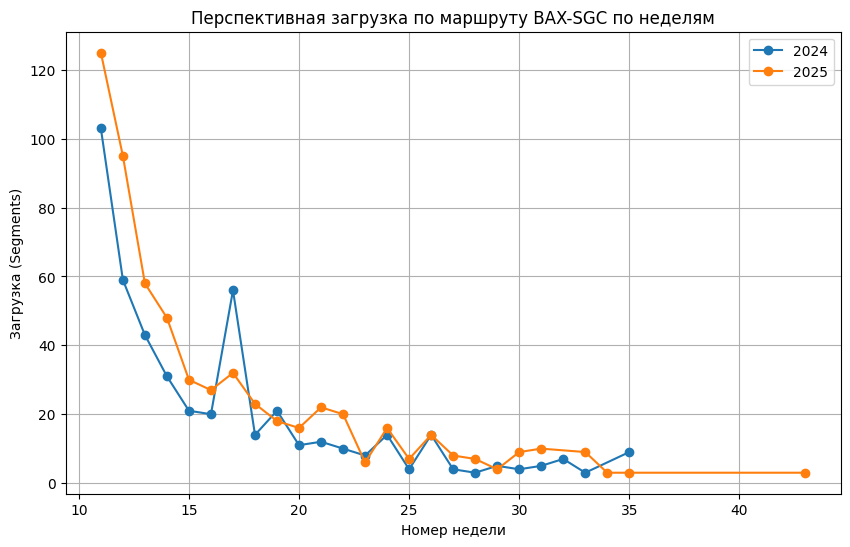

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(route_2024_weekly.index, route_2024_weekly.values, label='2024', marker='o')
plt.plot(route_2025_weekly.index, route_2025_weekly.values, label='2025', marker='o')
plt.title(f'Перспективная загрузка по маршруту {top_route} по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Загрузка (Segments)')
plt.legend()
plt.grid()
plt.show()